In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import scipy.stats as stats

In [21]:
def gevcTrain(train):
    neigh = NearestNeighbors(n_neighbors=2)
    neigh.fit(train)
    n, _ = train.shape
    distances = np.array([neigh.kneighbors([train[i]])[0][0][1] for i in range(0, n)])
    distances = distances[distances!=0]
    #stats.exponweib.fit(data, 1, 1, scale=0.2, loc=0)
    params = stats.exponweib.fit(distances, 1, 1, scale=0.2, loc=0)
    return params

In [22]:
def gevcTest(train, test, pre, prob=False, alpha=0.001):
    neigh = NearestNeighbors(n_neighbors=2)
    neigh.fit(train)
    n, _ = test.shape
    distances = np.array([neigh.kneighbors([test[i]])[0][0][1] for i in range(0, n)])
    out = 1 - stats.exponweib.pdf(distances, *pre)
    if prob==False:
        # 1 if known, 0 if unknown
        out = [1 if k > alpha else 0 for k in out]
    return out

In [ ]:
%%time
sample_1=np.random.multivariate_normal([-5, -5], [[1, 0], [0, 1]], 1000)
sample_2=np.random.multivariate_normal([-10, -10], [[1, 0], [0, 1]], 1000)
test_sample=np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], 10)
train=np.concatenate((sample_1, sample_2), axis=0)
result=gevcTest(train, test_sample, gevcTrain(train))

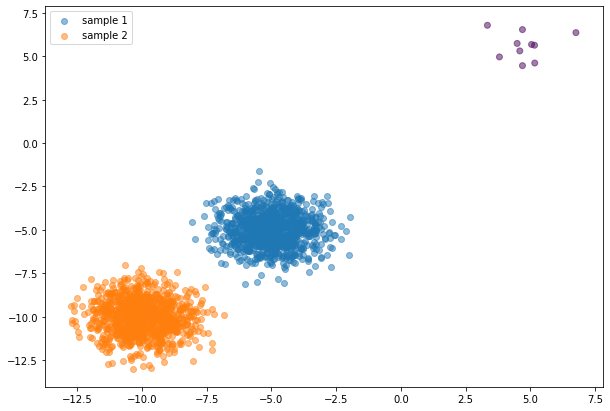

In [23]:
plt.figure(figsize=(10, 7))
plt.scatter(sample_1[:, 0], sample_1[:, 1], alpha=0.5, label='sample 1')
plt.scatter(sample_2[:, 0], sample_2[:, 1], alpha=0.5, label='sample 2')
plt.scatter(test_sample[:, 0], test_sample[:, 1], alpha=0.5, c=result)
plt.legend()
plt.show()

In [212]:
def gpdcTrain(train, k):
    q = 1-1/(1*k)
    n, p = train.shape
    neigh = NearestNeighbors(n_neighbors=k+1)
    neigh.fit(train)
    distances = -np.array([neigh.kneighbors([train[i]])[0][0][1:] for i in range(0, n)])
    #distances = -np.array([neigh.kneighbors([train[i]])[0][0][1:] for i in range(0, n)])[:,]
    threshold = distances[:, -1]
    threshold = np.repeat(threshold, k-1).reshape(2000, k-1)
    distances = np.delete(distances, k-1, 1)
    R = distances/threshold
    shape = np.log(R)
    shape = np.where(np.isinf(shape), np.zeros_like(shape) , shape)
    shape = np.nanmean(shape, axis=1)

    ball=-stats.genpareto.pdf(threshold[:, 1], threshold[:, 1]*shape, shape)
    pshape=p*shape
    return (pshapes, ball, k)

In [41]:
def gpdcTest(train, test, pre, prob=False, alpha=0.001):
    neigh = NearestNeighbors(n_neighbors=2)
    neigh.fit(train)
    n, p = test.shape
    
def gpdcTest(train, test, pre, prob=False, alpha=0.001):
    q = 1-1/(1*k)
    n, p = test.shape
    neigh = NearestNeighbors(n_neighbors=k+1)
    neigh.fit(train)
    distances = -np.array([neigh.kneighbors([test[i]])[0][0][1:] for i in range(0, n)])
    #distances = -np.array([neigh.kneighbors([train[i]])[0][0][1:] for i in range(0, n)])[:,]
    threshold = distances[:, -1]
    threshold = np.repeat(threshold, k-1).reshape(2000, k-1)
    distances = np.delete(distances, k-1, 1)
    R = distances/threshold
    shape = np.log(R)
    shape = np.where(np.isinf(shape), np.zeros_like(shape) , shape)
    shape = np.nanmean(shape, axis=1)
    
    ball=-stats.genpareto.pdf(threshold[:, 1], threshold[:, 1]*shape, shape)
    pshape=p*shape
    
    return out

In [209]:
k=5
neigh = NearestNeighbors(n_neighbors=k+1)
neigh.fit(train)
distances = -np.array([neigh.kneighbors([train[i]])[0][0][1:] for i in range(0, n)])
#distances = -np.array([neigh.kneighbors([train[i]])[0][0][1:] for i in range(0, n)])[:,]
threshold = distances[:, -1]
threshold = np.repeat(threshold, k-1).reshape(2000, k-1)
distances = np.delete(distances, k-1, 1)
R = distances/threshold
shape = np.log(R)
shape = np.where(np.isinf(shape), np.zeros_like(shape) , shape)
shape = np.nanmean(shape, axis=1)

ball=stats.genpareto.pdf(threshold[:, 1], threshold[:, 1]*shape, shape)
pshape=p*shape

In [210]:
pshape

array([-0.39724915, -1.24311635, -0.27344794, ..., -0.56436633,
       -1.09774663, -0.44962497])

In [161]:
#shape = np.where(R==0, np.nan, R)
shape = np.log(R)
shape = np.where(np.isinf(shape), np.zeros_like(shape) , shape)
shape = np.nanmean(shape, axis=1)

array([-0.19862457, -0.62155817, -0.13672397, ..., -0.28218317,
       -0.54887331, -0.22481248])

In [ ]:
  ball <- apply(cbind(shape,threshold),1,function(x)
    -evd::qgpd(q,x[2],x[1]*x[2],x[1]))

In [208]:
stats.genpareto.pdf(threshold[:, 1], threshold[:, 1]*shape, shape)

array([0.96413502, 0.59791946, 0.        , ..., 0.        , 0.62868466,
       0.        ])

array([0.03242095, 0.08588055, 0.020292  , ..., 0.08014979, 0.05725846,
       0.05186064])

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import scipy.stats as stats
import tensorflow as tf

def gevcTest(train, test, pre, prob=False, alpha=0.001):
    neigh = NearestNeighbors(n_neighbors=2)
    neigh.fit(train)
    n, _ = test.shape
    distances = np.array([neigh.kneighbors([test[i]])[0][0][1] for i in range(0, n)])
    out = 1 - stats.exponweib.pdf(distances, *pre)
    if prob==False:
        # 1 if known, 0 if unknown
        out = [1 if k > alpha else 0 for k in out]
    return out

def gevcTest(train, test, pre, prob=False, alpha=0.001):
    neigh = NearestNeighbors(n_neighbors=2)
    neigh.fit(train)
    n, _ = test.shape
    distances = np.array([neigh.kneighbors([test[i]])[0][0][1] for i in range(0, n)])
    out = 1 - stats.exponweib.pdf(distances, *pre)
    if prob==False:
        # 1 if known, 0 if unknown
        out = [1 if k > alpha else 0 for k in out]
    return out

In [215]:
tf.zeros(0)

<tf.Tensor 'zeros:0' shape=(0,) dtype=float32>

In [235]:
sample_1=tf.random.normal(2, 0, 2)
sample_2=tf.random.normal([-10, -10], [[1, 0], [0, 1]], 1000)
test_sample=np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], 10)
train=np.concatenate((sample_1, sample_2), axis=0)
result=gevcTest(train, test_sample, gevcTrain(train))

ValueError: Shape must be rank 1 but is rank 0 for 'random_normal_10/RandomStandardNormal' (op: 'RandomStandardNormal') with input shapes: [].